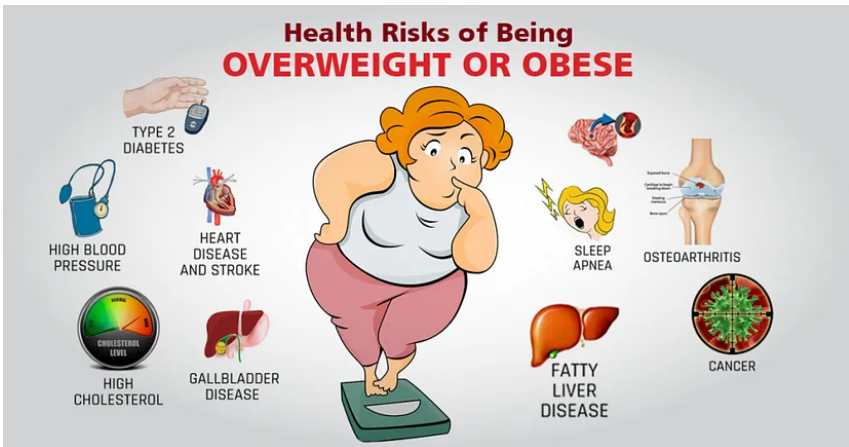

# Obesity Estimation

Obesity is a significant public health concern worldwide, linked with various chronic diseases and health risks including cardiovascular diseases, various types of cancer, diabetes mellitus amongst others. It is also a significant drain on world’s economy, estimated to cost 3.6% of GDP in all countries by 2060 if current trends hold up. It is well known that nutrition, physical activity, and lifestyle greatly impacts the obesity level. Therefore, the ability to accurately estimate and classify obesity levels based on eating habits and physical activity is crucial for preventive healthcare interventions and personalized treatment strategies. 

## Dataset and Objective
This project aims to develop machine learning models to predict obesity levels using publicly available training dataset [Multi-Class Prediction of Obesity Risk](https://www.kaggle.com/competitions/playground-series-s4e2) from Kaggle. The dataset that I am using is generated from a deep learning model trained on the Obesity dataset [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) from the UCI Machine Learning Repository. The objective is to estimate obesity level based on different life style factors.

To experiment with the different things, I am using few different approach 
* Using Small dataset for Training and Large for Testing, without splitting
* Using Large dataset for Training and Small for Testing, without splitting 
* Using Large dataset for Training and Small for Testing. Using Train-Test split and using pipeline and custom transformers for data preprocessing.


# Using small data for training and Large for testing. Without splitting 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
SmallTrain = pd.read_csv('Original_ObesityDataSet.csv') # This is the original dataset
LargeTest = pd.read_csv('train.csv') # This is the train dataset from kaggle but taking it for testing

In [3]:
LargeTest = LargeTest.drop(columns='id')

In [4]:
SmallTrain.shape

(2111, 17)

In [5]:
LargeTest.shape

(20758, 17)

In [6]:
SmallTrain.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
numerical_features = SmallTrain.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = SmallTrain.select_dtypes(include=['object', 'bool']).columns.tolist()

In [8]:
SmallTrain[categorical_features].nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

# Working on Categorical Features 

In [9]:
unique_values = {column: SmallTrain[column].unique().tolist() for column in categorical_features}

# Print unique values
for column, unique_vals in unique_values.items():
    print(f"Unique values in {column}: {unique_vals}")

Unique values in Gender: ['Female', 'Male']
Unique values in family_history_with_overweight: ['yes', 'no']
Unique values in FAVC: ['no', 'yes']
Unique values in CAEC: ['Sometimes', 'Frequently', 'Always', 'no']
Unique values in SMOKE: ['no', 'yes']
Unique values in SCC: ['no', 'yes']
Unique values in CALC: ['no', 'Sometimes', 'Frequently', 'Always']
Unique values in MTRANS: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
Unique values in NObeyesdad: ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']


For features with binary unique values like Gender, family_history_with_Overweight, FAVC, SMOKE, SCC I will use binary mappings. For CAEC and CALC I will use custom mapping to preseve the order and lastly for MTRAN one-hot encoding will be used

# Working On Numerical Data 

# Checking whether Standardization is required for Numerical features

In [10]:
numeric_df = SmallTrain.select_dtypes(include=['float64', 'int64'])

# Calculate variance for each numeric feature
variances = numeric_df.var()

# Print variance values
print(variances)


Age        40.271313
Height      0.008706
Weight    685.977477
FCVC        0.285078
NCP         0.605344
CH2O        0.375712
FAF         0.723507
TUE         0.370792
dtype: float64


As we can see Weight is the High Variance Feature So I will do Standardization to make sure that all features contribute equally to the model.

# Working on Target

In [11]:
SmallTrain['NObeyesdad']

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

## For Target I will use LabelEncoder__

### Separating Features and Target 

In [12]:
y_train = SmallTrain['NObeyesdad']
X_train = SmallTrain.drop(columns='NObeyesdad')
y_test = LargeTest['NObeyesdad']
X_test = LargeTest.drop(columns='NObeyesdad')

In [13]:
###Later

# Fit the encoder on the training set
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Transform the test set with the same encoder
y_test = label_encoder.transform(y_test)


In [14]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [15]:
y_train

array([1, 1, 1, ..., 4, 4, 4])

In [16]:

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [17]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,-0.522124,-0.875589,-0.862558,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,-1.188039,0.561997,no,Public_Transportation
1,Female,-0.522124,-1.947599,-1.168077,yes,no,1.088342,0.404153,Sometimes,yes,1.618759,yes,2.339750,-1.080625,Sometimes,Public_Transportation
2,Male,-0.206889,1.054029,-0.366090,yes,no,-0.785019,0.404153,Sometimes,no,-0.013073,no,1.163820,0.561997,Frequently,Public_Transportation
3,Male,0.423582,1.054029,0.015808,no,no,1.088342,0.404153,Sometimes,no,-0.013073,no,1.163820,-1.080625,Frequently,Walking
4,Male,-0.364507,0.839627,0.122740,no,no,-0.785019,-2.167023,Sometimes,no,-0.013073,no,-1.188039,-1.080625,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,-0.525774,0.097045,1.711763,yes,yes,1.088342,0.404153,Sometimes,no,-0.456705,no,0.783135,0.407996,Sometimes,Public_Transportation
2107,Female,-0.367195,0.502844,1.800914,yes,yes,1.088342,0.404153,Sometimes,no,-0.004702,no,0.389341,-0.096251,Sometimes,Public_Transportation
2108,Female,-0.281909,0.541672,1.798868,yes,yes,1.088342,0.404153,Sometimes,no,0.075361,no,0.474971,-0.019018,Sometimes,Public_Transportation
2109,Female,0.007776,0.404927,1.785780,yes,yes,1.088342,0.404153,Sometimes,no,1.377801,no,0.151471,-0.117991,Sometimes,Public_Transportation


In [18]:
from sklearn import preprocessing

def data_transformation(df):
    # Binary mapping for certain columns
    df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
    df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
    df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
    df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    
    # Custom mapping for CAEC and CALC to match with the Research paper
    custom_mapping = {'no': 1, 'Sometimes': 2, 'Frequently': 3, 'Always': 4}
    df['CAEC'] = df['CAEC'].map(custom_mapping)
    df['CALC'] = df['CALC'].map(custom_mapping)
    
    # One-hot encoding for MTRANS
    one_hot_encoder = preprocessing.OneHotEncoder()
    means_of_trns_encoded = pd.DataFrame(
        one_hot_encoder.fit_transform(df[['MTRANS']]).toarray(),
        columns=one_hot_encoder.get_feature_names_out(['MTRANS'])) 
    
    # Join the one-hot encoded columns and drop the original MTRANS column
    transformed_df = df.join(means_of_trns_encoded) 
    transformed_df = transformed_df.drop(["MTRANS"], axis=1)
    
    return transformed_df


In [19]:
X_train= data_transformation(X_train)

In [20]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,-0.522124,-0.875589,-0.862558,1,0,-0.785019,0.404153,2,0,-0.013073,0,-1.188039,0.561997,1,0.0,0.0,0.0,1.0,0.0
1,0,-0.522124,-1.947599,-1.168077,1,0,1.088342,0.404153,2,1,1.618759,1,2.339750,-1.080625,2,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,1,0,-0.785019,0.404153,2,0,-0.013073,0,1.163820,0.561997,3,0.0,0.0,0.0,1.0,0.0
3,1,0.423582,1.054029,0.015808,0,0,1.088342,0.404153,2,0,-0.013073,0,1.163820,-1.080625,3,0.0,0.0,0.0,0.0,1.0
4,1,-0.364507,0.839627,0.122740,0,0,-0.785019,-2.167023,2,0,-0.013073,0,-1.188039,-1.080625,2,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1,1.088342,0.404153,2,0,-0.456705,0,0.783135,0.407996,2,0.0,0.0,0.0,1.0,0.0
2107,0,-0.367195,0.502844,1.800914,1,1,1.088342,0.404153,2,0,-0.004702,0,0.389341,-0.096251,2,0.0,0.0,0.0,1.0,0.0
2108,0,-0.281909,0.541672,1.798868,1,1,1.088342,0.404153,2,0,0.075361,0,0.474971,-0.019018,2,0.0,0.0,0.0,1.0,0.0
2109,0,0.007776,0.404927,1.785780,1,1,1.088342,0.404153,2,0,1.377801,0,0.151471,-0.117991,2,0.0,0.0,0.0,1.0,0.0


In [21]:
X_test= data_transformation(X_test)

In [22]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.8303304749975913
Confusion Matrix:
[[2361  150    0    1    0    7    4]
 [ 500 2192    9    0    0  342   39]
 [   3   11 2343  193   31   84  245]
 [   0    0   98 3108    0    3   39]
 [   1    0    0    4 4038    3    0]
 [  15  363   86    1    0 1614  348]
 [   0   73  345   23    3  498 1580]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2523
           1       0.79      0.71      0.75      3082
           2       0.81      0.81      0.81      2910
           3       0.93      0.96      0.94      3248
           4       0.99      1.00      0.99      4046
           5       0.63      0.67      0.65      2427
           6       0.70      0.63      0.66      2522

    accuracy                           0.83     20758
   macro avg       0.81      0.81      0.81     20758
weighted avg       0.83      0.83      0.83     20758



C:\Users\SANDIA KUMARI\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

# Print true positives, false positives, true negatives, and false negatives
print('True Positives (TP):', TP)
print('False Positives (FP):', FP)
print('True Negatives (TN):', TN)
print('False Negatives (FN):', FN)

# Optionally, print these metrics for each class
for i, class_name in enumerate(label_encoder.classes_):
    print(f'\nClass: {class_name}')
    print(f'TP: {TP[i]}')
    print(f'FP: {FP[i]}')
    print(f'TN: {TN[i]}')
    print(f'FN: {FN[i]}')


True Positives (TP): [2361 2192 2343 3108 4038 1614 1580]
False Positives (FP): [519 597 538 222  34 937 675]
True Negatives (TN): [17716 17079 17310 17288 16678 17394 17561]
False Negatives (FN): [162 890 567 140   8 813 942]

Class: Insufficient_Weight
TP: 2361
FP: 519
TN: 17716
FN: 162

Class: Normal_Weight
TP: 2192
FP: 597
TN: 17079
FN: 890

Class: Obesity_Type_I
TP: 2343
FP: 538
TN: 17310
FN: 567

Class: Obesity_Type_II
TP: 3108
FP: 222
TN: 17288
FN: 140

Class: Obesity_Type_III
TP: 4038
FP: 34
TN: 16678
FN: 8

Class: Overweight_Level_I
TP: 1614
FP: 937
TN: 17394
FN: 813

Class: Overweight_Level_II
TP: 1580
FP: 675
TN: 17561
FN: 942


# Approach 2

Approach 2 is in another file named as InitialCodeFile-2